In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.text import TextPath
import seaborn as sns

In [2]:
normclust = pd.read_csv('../normalized_clustered.csv', index_col = 0)

In [3]:
normclust.columns

Index(['age', 'bmi', 'ed_v', 'v_vv', 'sofa', 'pfr', 'pco2', 'pplat', 'lymph',
       'nlrat', 'pct', 'ferritin', 'crp', 'fib', 'ddim', 'cluster'],
      dtype='object')

In [4]:
features = ['age', 'bmi', 'ed_v', 'v_vv', 'sofa', 'pfr', 'pco2', 'pplat', 'lymph',
       'nlrat', 'pct', 'ferritin', 'crp', 'fib', 'ddim']

x = normclust.loc[:, features].values
y = normclust.loc[:,['cluster']].values

In [5]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

In [6]:
pcadf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pcaclus = pd.concat([pcadf, normclust[['cluster']]], axis = 1)

In [7]:
# Create a DF of feature significancs

components = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])

In [8]:
components

,age,bmi,ed_v,v_vv,sofa,pfr,pco2,pplat,lymph,nlrat,pct,ferritin,crp,fib,ddim
PC1,0.247725,-0.055894,-0.073255,0.130543,0.445569,-0.175508,0.034277,0.098418,-0.008681,0.003483,0.468862,0.146877,0.391609,0.246957,0.465906
PC2,0.148001,0.145052,0.421740,-0.650058,0.026534,-0.091460,0.051647,-0.051589,-0.339887,0.258898,0.098470,0.108427,-0.027775,-0.320599,0.186166


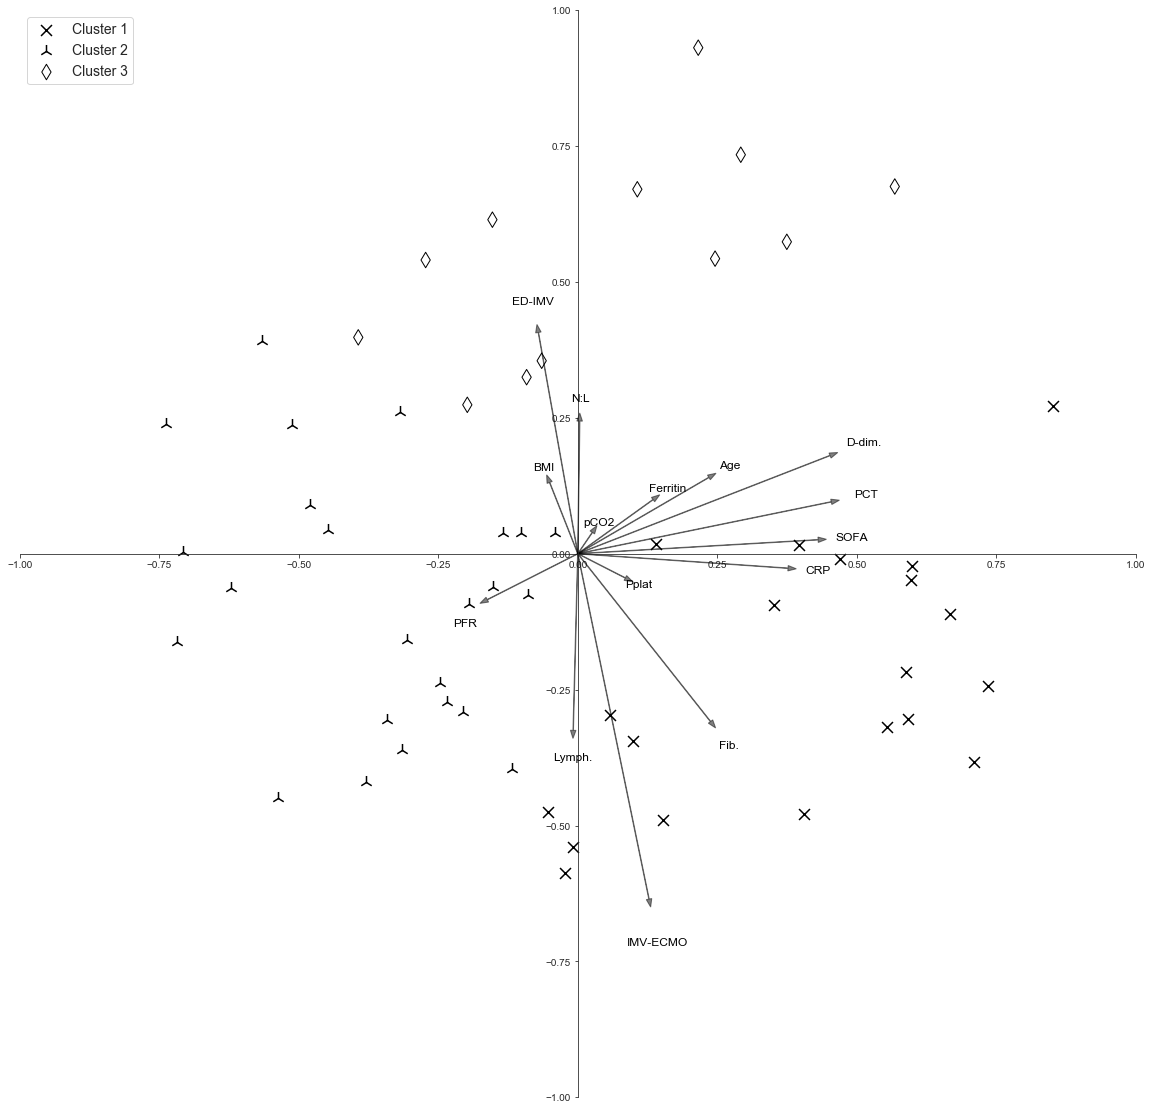

In [11]:
# Plot with liens representing the contribution of each feature to the principal components


sns.set_style("ticks")

fig = plt.figure(figsize=(20,20))
fig.tight_layout()
ax = fig.add_subplot()

x0 = pcaclus[pcaclus['cluster'] == 0]['PC1']
y0 = pcaclus[pcaclus['cluster'] == 0]['PC2']
x1 = pcaclus[pcaclus['cluster'] == 1]['PC1']
y1 = pcaclus[pcaclus['cluster'] == 1]['PC2']
x2 = pcaclus[pcaclus['cluster'] == 2]['PC1']
y2 = pcaclus[pcaclus['cluster'] == 2]['PC2']
clus = pcaclus['cluster']

names = ['Age', 'BMI', 'ED-IMV', 'IMV-ECMO', 'SOFA', 'PFR', 'pCO2', 'Pplat', 'Lymph.',
       'N:L', 'PCT', 'Ferritin', 'CRP', 'Fib.', 'D-dim.']

components.columns = names

Z = TextPath((-4.5,0), "Z")
X = TextPath((-4.5,0), "X")
Y = TextPath((-4.5,0), "Y")


## Plot arrows corresponding to variable contribution to clusters
for i in components.columns:
    plt.arrow(0, 0, components.loc['PC1', i], components.loc['PC2',i],color = 'k',alpha = 0.5, length_includes_head=True, head_width=0.01)
    if i == 'PFR':
            plt.text(components.loc['PC1',i]* 1.15, components.loc['PC2',i] * 1.4, i, color = 'k', ha = 'center', va = 'center', fontsize=12)
    else:
            plt.text(components.loc['PC1',i]* 1.1, components.loc['PC2',i] * 1.1, i, color = 'k', ha = 'center', va = 'center', fontsize=12)

c1 = plt.scatter(x1, y1, s=120, marker='x', label='Cluster 1', c='k')
c0 = plt.scatter(x0, y0, s=170, marker='2', label='Cluster 2', c='k')
c2 = plt.scatter(x2, y2, s=120, marker='d', label='Cluster 3', edgecolors='k', facecolors='none')



ax.legend(loc='upper left', fontsize=14)

#ax.set_title('Cluster Membership Represented Following Dimensionality Reduction With PCA', fontsize=16, pad=30)
#ax.set_xlabel('Princal Component 1')
#ax.set_ylabel('Princal Component 2')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
plt.savefig('Figure1_2DPCA.png')
plt.show()
